# 2022 NZMSA Data Science Submission.

In [94]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

## Numerical

In [95]:
dataset = pd.read_csv("weather-data.csv")

print("Average (mean):")
print(dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].mean())
print("-"*20)
print("Standard deviation:")
print(dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].std())
print("-"*20)
print("10th and 90th percentile range")
percentiles_10th = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].quantile(0.1)
percentiles_90th = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].quantile(0.9)
print(percentiles_90th - percentiles_10th)

Average (mean):
tmpc    15.811503
dwpc    12.115772
relh    79.782307
sknt     8.919029
gust    30.962594
dtype: float64
--------------------
Standard deviation:
tmpc     4.235197
dwpc     3.738005
relh    12.562199
sknt     5.348379
gust     6.319510
dtype: float64
--------------------
10th and 90th percentile range
tmpc    10.00
dwpc    10.00
relh    31.14
sknt    13.00
gust    15.00
dtype: float64


## Graphical

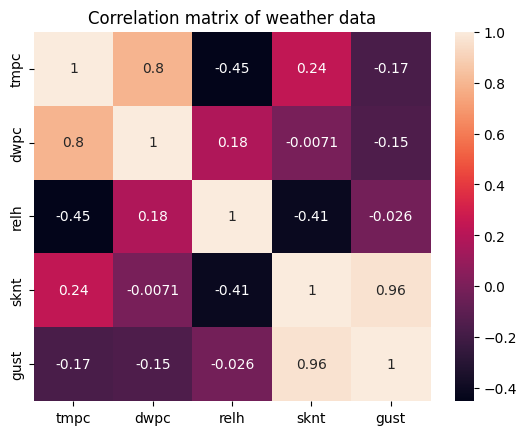

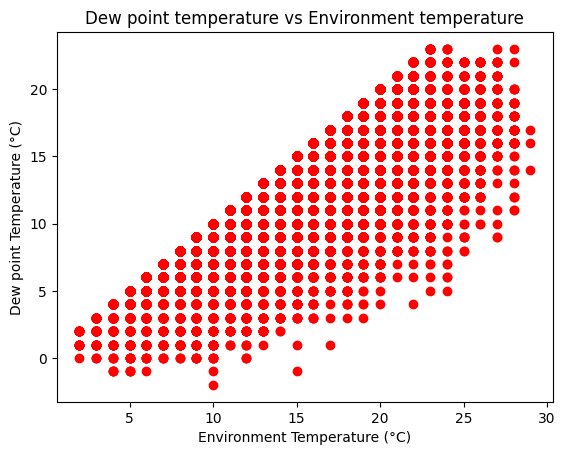

In [158]:
corrMatrix = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation matrix of weather data")
plt.show()

plt.plot(dataset['tmpc'], dataset['dwpc'], 'ro')
plt.title("Dew point temperature vs Environment temperature")
plt.xlabel('Environment Temperature (°C)')
plt.ylabel('Dew point Temperature (°C)')
plt.show()

## Comment on the dataset

All the data in the dataset appear to be collected from the same station which is NZAA. The data are collected on the dates ranging from 1/01/2015 0:00 to 30/12/2020 23:30. The the gust measurement column of the dataset is sparsely populated compared to the other measurement columns of tmpc, dwpc, relh and sknt. The peak_wind_drct column appears to have no data present in it so it was ignored in the EDA.

# Data Processing

## Making changes

In [219]:
# dataset.head() # Show the first five results.
dataset = pd.read_csv("weather-data.csv")
print(dataset.head()) # Show the first five results.

# remove useless data
dataset.drop(columns=[" station", "gust", "peak_wind_drct"], inplace=True)

# convert 'valid' column data type to unix timestamps in int64 format
print("Old 'valid' col data type: " + str(dataset['valid'].dtypes))
dataset['valid'] = pd.to_datetime(dataset['valid'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
dataset['valid'] = (dataset['valid'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
print("New 'valid' col data type: " + str(dataset['valid'].dtypes))

dataset.head()

   station             valid  tmpc  dwpc   relh  sknt  gust  peak_wind_drct
0     NZAA  2015-01-01 00:00  21.0  11.0  52.77  15.0   NaN             NaN
1     NZAA  2015-01-01 00:30  21.0  10.0  49.37  16.0   NaN             NaN
2     NZAA  2015-01-01 01:00  21.0  12.0  56.38  16.0   NaN             NaN
3     NZAA  2015-01-01 01:30  21.0  13.0  60.21  16.0   NaN             NaN
4     NZAA  2015-01-01 02:00  21.0  12.0  56.38  16.0   NaN             NaN
Old 'valid' col data type: object
New 'valid' col data type: int64


,valid,tmpc,dwpc,relh,sknt
0,1420070400,21.0,11.0,52.77,15.0
1,1420072200,21.0,10.0,49.37,16.0
2,1420074000,21.0,12.0,56.38,16.0
3,1420075800,21.0,13.0,60.21,16.0
4,1420077600,21.0,12.0,56.38,16.0


## Train/test split
The data will split randomly with 80% of the data used for training data and the remaining 20% used for testing data

In [241]:
from sklearn.model_selection import train_test_split
RAND_SEED = 42
# split dataset into 80/20 train/test sets with replicable random_state
train, test = train_test_split(dataset, test_size=0.2, random_state=RAND_SEED)
print("Original dataset  size: " + str(dataset.size))
print("Train set size: " + str(train.size))
print("Test set size: " + str(test.size))

Original dataset  size: 518565
Train set size: 414850
Test set size: 103715


## Reason for changes
- ` station` column is removed because they are all from NZAA
- `gust` column is removed because there is not sufficient data
    - only using other data where gust was recorded as well will waste much of the data we have
- `peak_wind_drct` column is removed since there is no data in this column
- `valid` column converted to unix timestamps in int64 format since models will only understand numbers
    - `valid` was previously in object format

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.